In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing import image

In [2]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255
 )

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_datagen.flow_from_directory(
    './Train/',
    target_size = (32,32),
    batch_size = 32,color_mode='grayscale',
     class_mode = 'categorical')

Found 751228 images belonging to 35 classes.


In [4]:
validation_generator = train_datagen.flow_from_directory(
    './Validation/',
    target_size = (32,32),
    batch_size = 32,color_mode='grayscale',
    class_mode = 'categorical')

Found 18104 images belonging to 35 classes.


In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [7]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [10]:
history = model.fit(train_generator, epochs=5, validation_data = validation_generator,  verbose=1)

Epoch 1/5
23476/23476 [==============================] - 334s 14ms/step - loss: 0.1967 - accuracy: 0.9345 - val_loss: 0.1987 - val_accuracy: 0.9393
Epoch 2/5
23476/23476 [==============================] - 325s 14ms/step - loss: 0.1935 - accuracy: 0.9354 - val_loss: 0.2065 - val_accuracy: 0.9369
Epoch 3/5
23476/23476 [==============================] - 320s 14ms/step - loss: 0.1920 - accuracy: 0.9361 - val_loss: 0.2045 - val_accuracy: 0.9365
Epoch 4/5
23476/23476 [==============================] - 326s 14ms/step - loss: 0.1903 - accuracy: 0.9365 - val_loss: 0.2222 - val_accuracy: 0.9363
Epoch 5/5
23476/23476 [==============================] - 321s 14ms/step - loss: 0.1893 - accuracy: 0.9368 - val_loss: 0.1949 - val_accuracy: 0.9416


In [11]:
model.save('text_rec.h5')

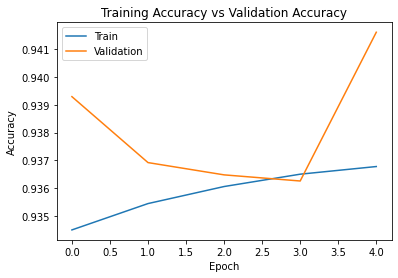

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

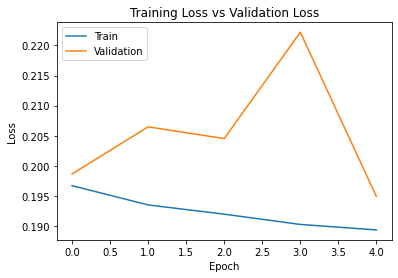

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()